# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

## **Importing the Tidyverse**

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## **Importing the Wind Turbine Data**

In [17]:
wind_turbine =  read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv', 
    col_types = cols()
                        )

In [16]:
# Verifying import occurred and previewing inital 3 rows of data
wind_turbine %>% head(3)

objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

## **Viewing Data and Creating a Factor Variable**

In [15]:
# I used the count function to get a sense of the breakdown of the provinces, 
# so that I can better anticipate what the plots will look like.
count(wind_turbine, province_territory)

province_territory,n
<chr>,<int>
Alberta,900
British Columbia,292
Manitoba,133
New Brunswick,119
Newfoundland and Labrador,27
Northwest Territories,4
Nova Scotia,310
Ontario,2663
Prince Edward Island,104


In [14]:
# Converting the province variable into a factor variable called province_sorted

wind_sorted = wind_turbine %>%
    mutate(province_sorted = province_territory %>% 
                             fct_infreq() %>% 
                             fct_rev()) # I added fct_rev at the end because I prefer graphs to have the highest value on top
#Checking the sort
count(wind_sorted, province_sorted)

province_sorted,n
<fct>,<int>
Yukon,2
Northwest Territories,4
Newfoundland and Labrador,27
Prince Edward Island,104
New Brunswick,119
Manitoba,133
Saskatchewan,153
British Columbia,292
Nova Scotia,310


## **Plotting a Bar Graph of Frequencies** 

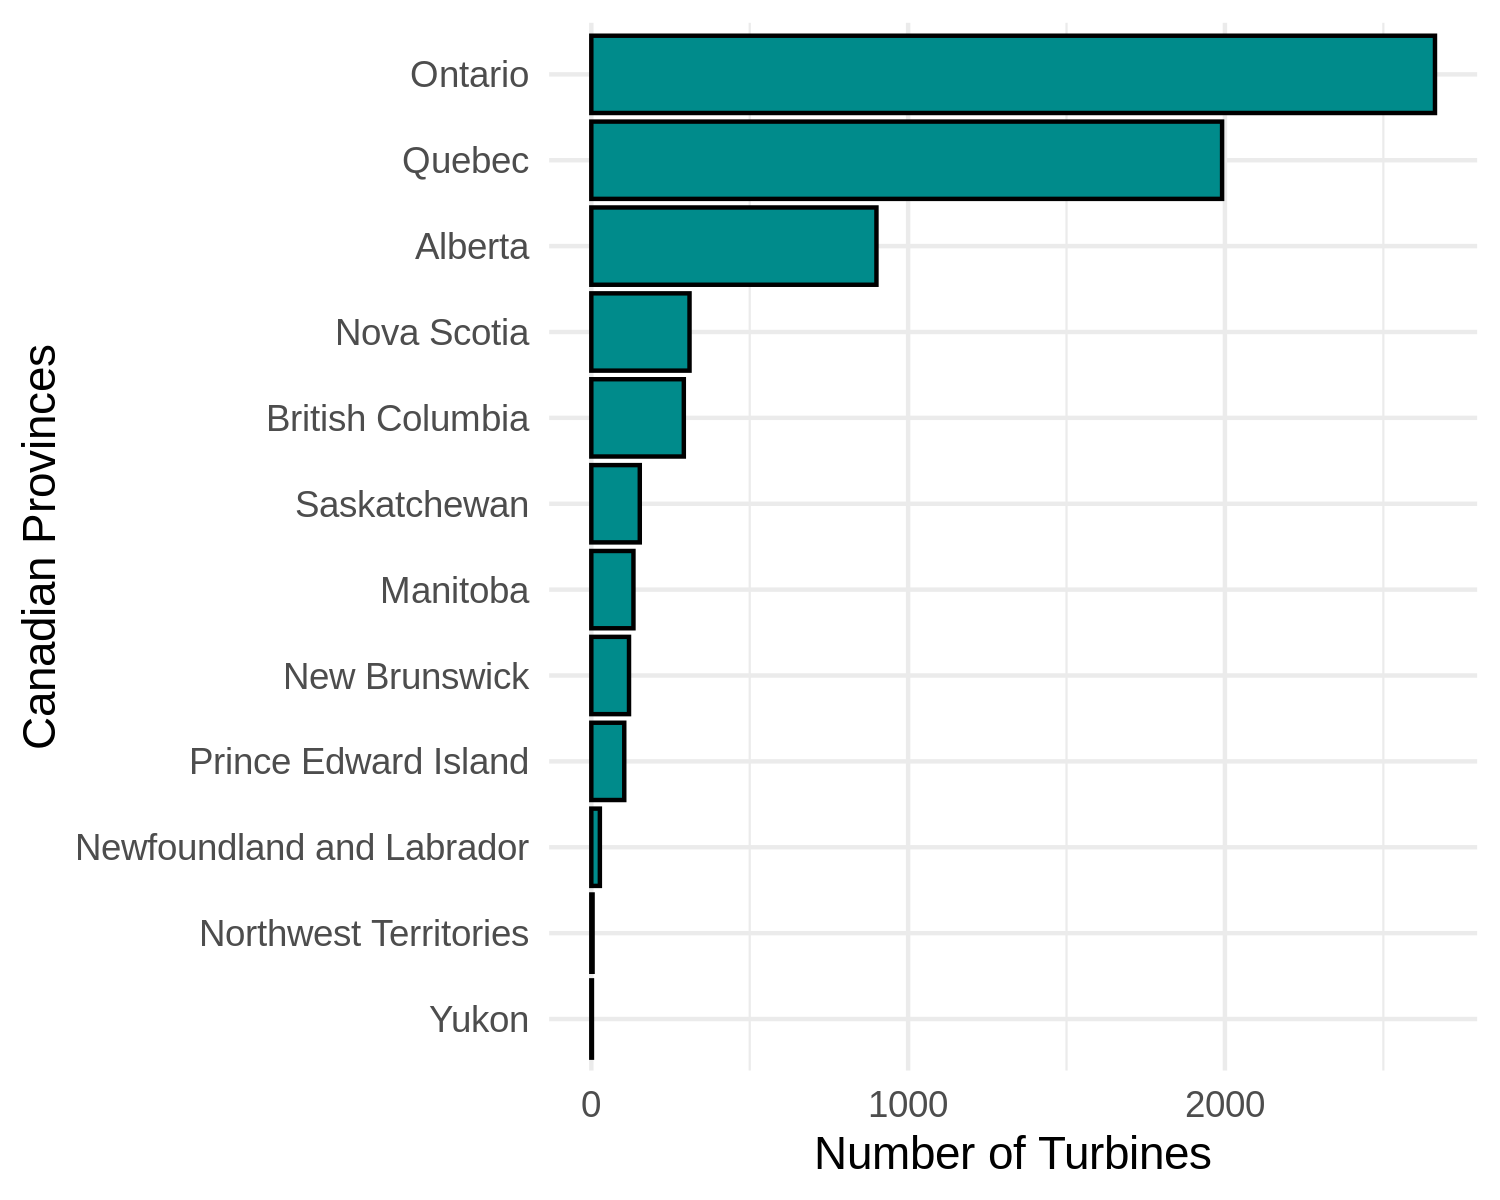

In [13]:
# The following is the code for the bar graph of the wind turbine factor variable

p = ggplot(wind_sorted, aes(y = province_sorted))

p = p + geom_bar()

# Renaming axes
p = p + labs(y = 'Canadian Provinces', x = 'Number of Turbines')

# Changing fill and outline of bars
p = p + geom_bar(fill = '#008b8b', color = '#000000')

# Applying the minimal theme to the graph
p = p + theme_minimal()

p


Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

## **Plotting Turbine Count by Manufacturer (Bonus in Next Plot)**

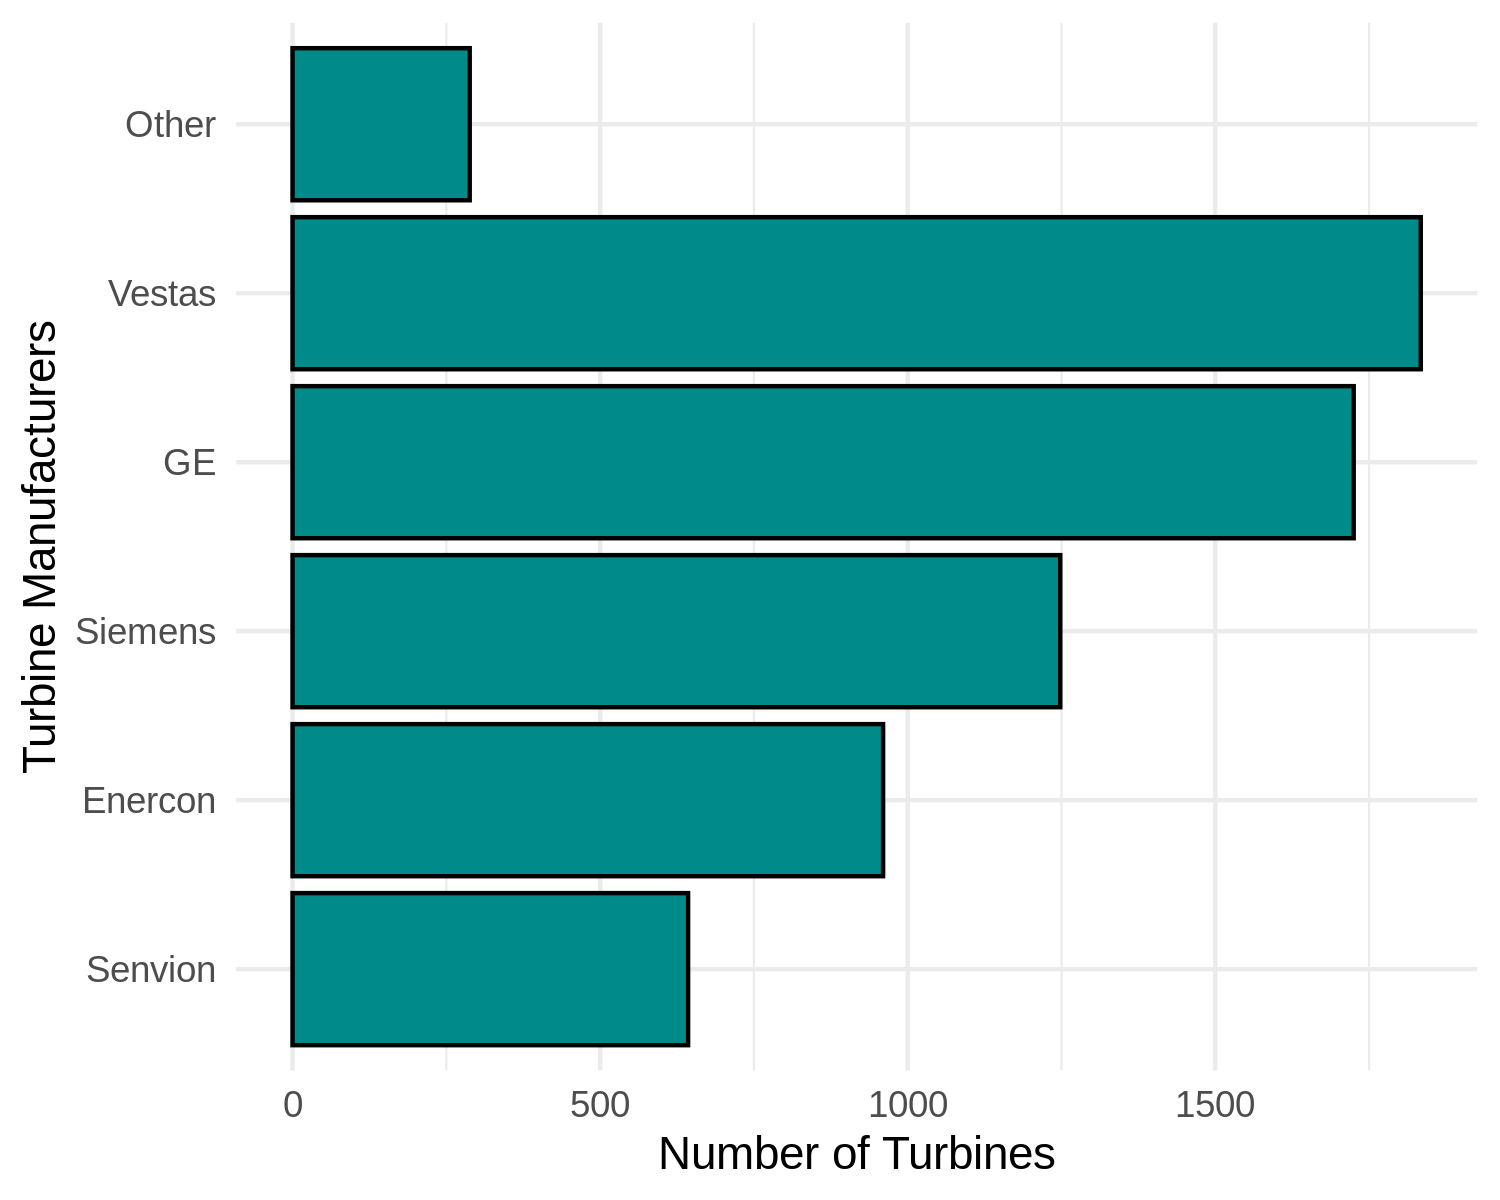

In [12]:
# I have chosen to group any manufacturer outside of the top 5 together in the "Other" category

# The following code creates a manufacturer factor variable that sorts the categories by frequency
wind_manufact_group= wind_turbine %>%
    mutate(manufacturer_group = manufacturer %>%
                                # Sort in Order
                                fct_infreq() %>%
                                # Reverse the Order for Aesthetic Preference
                                fct_rev() %>%
                                # Creating 'Other' Category
                                fct_lump(n = 5))

# I looked at the counts for my own edification, but the output is not be printed
# count(wind_manufact_group, manufacturer_group)

p2 = ggplot(wind_manufact_group, aes(y = manufacturer_group))

# Changing fill and outline of bars
p2 = p2 + geom_bar(fill = '#008b8b', color = '#000000')

# Adjusting axes labels
p2 = p2 + labs(y = 'Turbine Manufacturers', x = 'Number of Turbines')

# Applying minimal theme to plot
p2 = p2 + theme_minimal()

p2

## **Bonus Plot: Plotting Turbine Count by Manufacturer**  
***
### *Where "Other" is at the Bottom of the Graph*

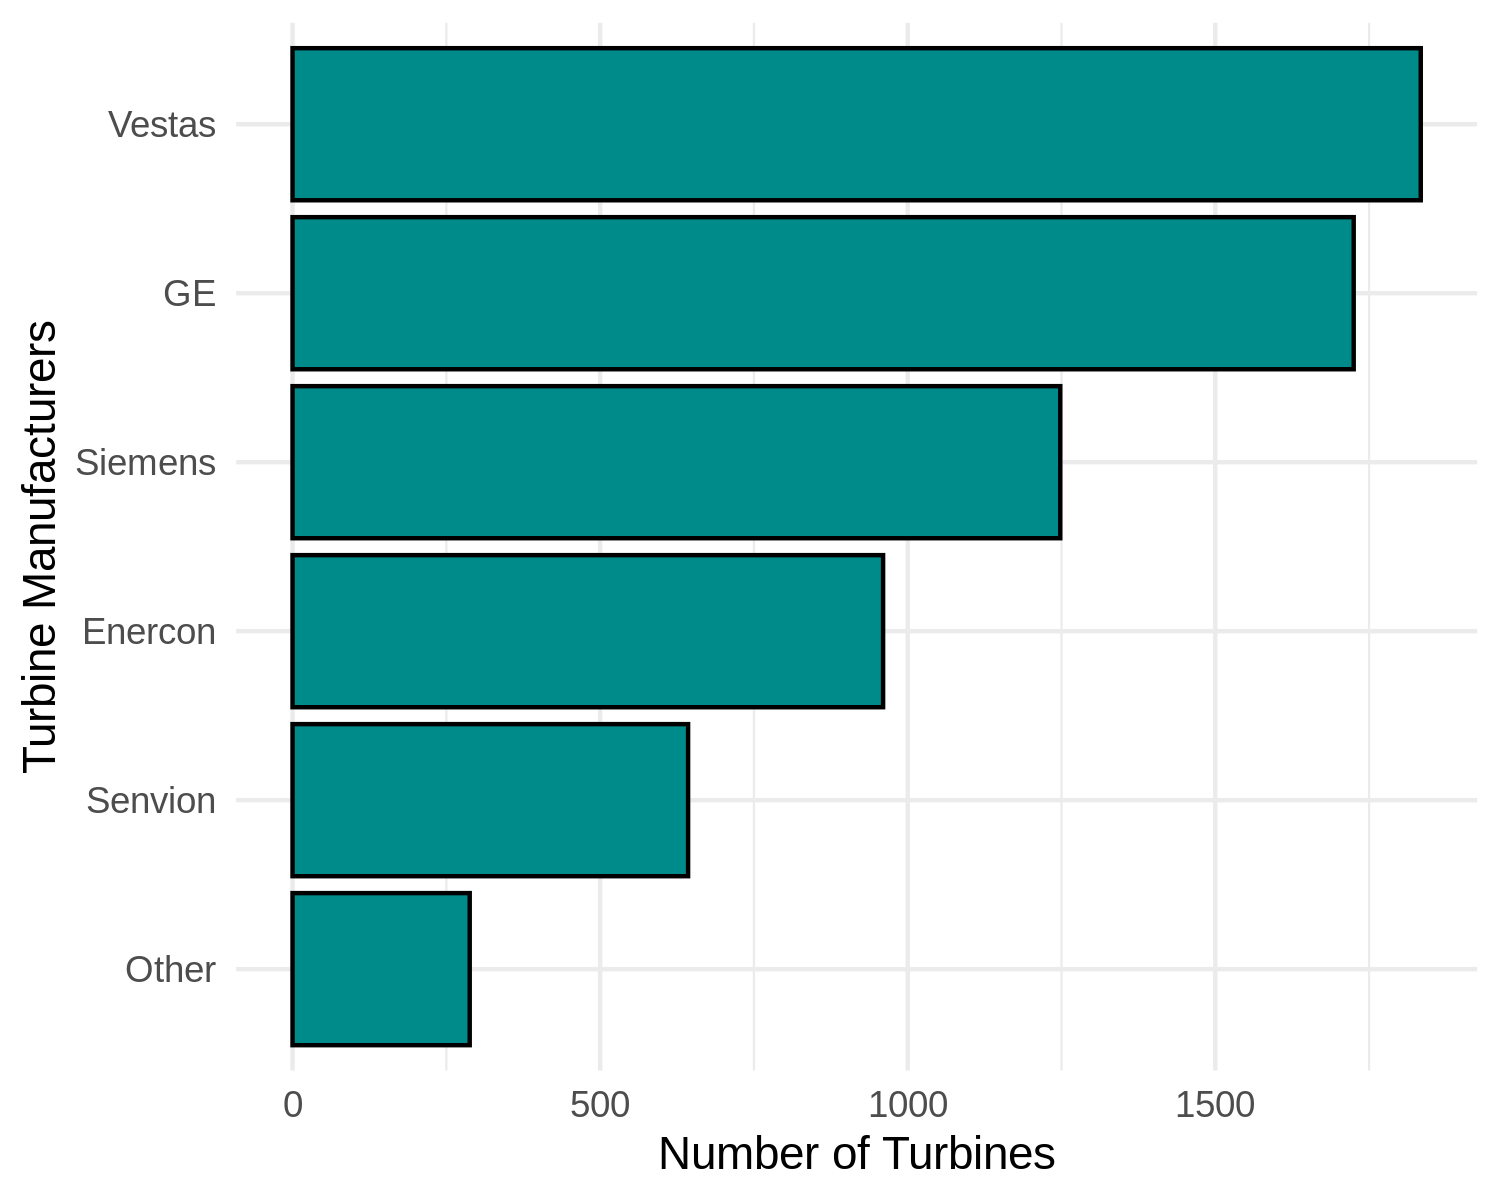

In [11]:
# The following code creates a manufacturer factor variable that sorts the categories by frequency and 
# also forces the other category to appear at the bottom of the plot.

wind_manufact_other = wind_turbine %>%
    mutate(manufacturer_other = manufacturer %>%
                   # First, group the categories into 5 and other
                   fct_lump(n = 5) %>% 
                   # Second, Order the categories by frequency
                   fct_infreq() %>%
                   # Third, force the Other category to be set after Infinity
                   fct_relevel('Other', after= Inf) %>%
                   # Finally, use forcat reverse to make the "Other" category appear at the bottom
                    fct_rev())

p3 = ggplot(wind_manufact_other, aes(y = manufacturer_other))

# Changing fill and outline of bars
p3 = p3 + geom_bar(fill = '#008b8b', color = '#000000')

# Adjusting axes labels
p3 = p3 + labs(y = 'Turbine Manufacturers', x = 'Number of Turbines')

# Applying minimal theme to plot
p3 = p3 + theme_minimal()

p3